# Analyze AirBnB Data for Seattle and Boston

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from matplotlib import style
style.use('ggplot')
from zipfile import ZipFile
import requests

In [2]:
# Change default settings to allow seeing all of the data in a table.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 40
pd.set_option('display.max_colwidth', 20)

# Supress warnings
warnings.filterwarnings("ignore")

### Business Understanding



So you want to start earning income by putting your home on AirBnB.  What are the most important things to know?
Three questions:

1) What locations in Seattle and Boston are the most popular (have the most rentals)?
2) Is there a difference in the median rental income for Seattle and Boston?
3) What features are correlated with higher rental income?
4) Does the rental income vary over time?


### Data Understanding

The following files are found in the AirBnB data for Boston and Seattle:

Boston:
calendar.csv, listings.csv, reviews.csv

Seattle:
calendar.csv, listings.csv, reviews.csv

They were downloaded from the AirBnB site at the follwing url:  http://insideairbnb.com/get-the-data.html

I changed the name of each file by adding a "-Boston" or "-Seattle" to identify the specific data.  

In [3]:
city_names = ['Boston', 'Seattle']

location_names = ['boston', 'seattle']

file_names = ['airbnb_seattle_listings.csv.gz',
              'airbnb_seattle_calendar.csv.gz',
              'airbnb_seattle_reviews.csv.gz',
              'airbnb_boston_listings.csv.gz',
              'airbnb_boston_calendar.csv.gz',
              'airbnb_boston_reviews.csv.gz']

destination_file_names = ['airbnb_seattle_listings.csv',
              'airbnb_seattle_calendar.csv',
              'airbnb_seattle_reviews.csv',
              'airbnb_boston_listings.csv',
              'airbnb_boston_calendar.csv',
              'airbnb_boston_reviews.csv']

destination_file = ['airbnb_seattle_listings',
              'airbnb_seattle_calendar',
              'airbnb_seattle_reviews',
              'airbnb_boston_listings',
              'airbnb_boston_calendar',
              'airbnb_boston_reviews']

abbr_list = ['listings.csv', 'calendar.csv', 'reviews.csv']

# file names for boston on http://insideairbnb.com/get-the-data.html website:
citydata = ['http://data.insideairbnb.com/united-states/wa/seattle/2020-10-25/data/listings.csv.gz',
'http://data.insideairbnb.com/united-states/wa/seattle/2020-10-25/data/calendar.csv.gz',
'http://data.insideairbnb.com/united-states/wa/seattle/2020-10-25/data/reviews.csv.gz',
'http://data.insideairbnb.com/united-states/ma/boston/2020-11-10/data/listings.csv.gz',
'http://data.insideairbnb.com/united-states/ma/boston/2020-11-10/data/calendar.csv.gz',
'http://data.insideairbnb.com/united-states/ma/boston/2020-11-10/data/reviews.csv.gz']

In [4]:
# This code takes the file names and city data above and loads the zip files onto your local directory
for i in range(6):

    url = citydata[i]

    filename = file_names[i]

    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

In [5]:
# This code unzips the file and places it in destination file
for i in range(6):
    destination_file[i] = pd.read_csv(file_names[i], compression = 'infer')
  

In [8]:
# This code renames the destination files    
airbnb_seattle_listings = destination_file[0]
airbnb_seattle_calendar = destination_file[1]
airbnb_seattle_reviews = destination_file[2]
airbnb_boston_listings = destination_file[3]
airbnb_boston_calendar = destination_file[4]
airbnb_boston_reviews = destination_file[5] 

In [9]:
airbnb_seattle_calendar['city'] = 'Seattle'
airbnb_seattle_listings['city'] = 'Seattle'
airbnb_seattle_reviews['city'] = 'Seattle'
airbnb_boston_calendar['city'] = 'Boston'
airbnb_boston_listings['city'] = 'Boston'
airbnb_boston_reviews['city'] = 'Boston'


In [10]:
print(airbnb_seattle_calendar.shape, airbnb_boston_calendar.shape)
print(airbnb_seattle_listings.shape, airbnb_boston_listings.shape)
print(airbnb_seattle_reviews.shape, airbnb_boston_reviews.shape)

(1582275, 8) (1180775, 8)
(4335, 75) (3236, 75)
(270875, 7) (123710, 7)


Based on the shape of each dataset, we should be able to concatenate boston and seattle under the same datasets, reducing the 6 files to 3.

In [11]:
frames_calendar = [airbnb_seattle_calendar,airbnb_boston_calendar ]
frames_listings = [airbnb_seattle_listings, airbnb_boston_listings]
reviews_listings =[airbnb_seattle_reviews, airbnb_boston_reviews]

calendar = pd.concat(frames_calendar)
listings = pd.concat(frames_listings)
reviews = pd.concat(reviews_listings)

In [12]:
print(calendar.shape)
print(listings.shape)
print(reviews.shape)

(2763050, 8)
(7571, 75)
(394585, 7)


Isuses with calendar data:
1) need to ensure data is datetime format

2) available column should be True or False (boolean)

3) remove the "$" symbol from the price column and convert it to a float64.

4) 


Let's begin by looking at the Seattle data files.

In [13]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city
0,22153582,2020-10-25,t,$144.00,$144.00,3,1125,Seattle
1,22153582,2020-10-26,t,$141.00,$141.00,3,1125,Seattle
2,22153582,2020-10-27,t,$149.00,$149.00,3,1125,Seattle
3,22153582,2020-10-28,t,$96.00,$96.00,3,1125,Seattle
4,22153582,2020-10-29,t,$102.00,$102.00,3,1125,Seattle


Notice that the price, weekly_price, monthly_prie, security_deposit, cleaning_fee, extra-people columns include the $ sign.  This will cause these variables to appear objects.  This will need to be removed and converted to  float64.


In [14]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,2318,https://www.airb...,20201025051148,2020-10-25,Casa Madrona - U...,"Gorgeous, archit...",Madrona is a hid...,https://a0.musca...,2536,https://www.airb...,Megan,2008-08-26,"Seattle, Washing...",I welcome guests...,within a day,100%,78%,t,https://a0.musca...,https://a0.musca...,Minor,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Madrona,Central Area,47.61082,-122.29082,Entire house,Entire home/apt,9,NaN,2.5 baths,4.0,4.0,"[""Children\u2019...",$295.00,1,1125,1.0,2.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,26,26,2020-10-25,32,4,0,2008-09-15,2020-02-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22,Seattle
1,9419,https://www.airb...,20201025051148,2020-10-25,Glorious sun roo...,Keeping you safe...,Lots of restaura...,https://a0.musca...,30559,https://www.airb...,Angielena,2009-08-09,"Seattle, Washing...",I am a visual ar...,within a few hours,100%,89%,t,https://a0.musca...,https://a0.musca...,Georgetown,8.0,8.0,"['email', 'phone...",t,t,"Seattle, Washing...",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in ...,Private room,2,NaN,3 shared baths,1.0,2.0,"[""Iron"", ""Hanger...",$55.00,2,180,2.0,2.0,180.0,180.0,2.0,180.0,NaN,t,29,59,89,364,2020-10-25,148,2,0,2010-07-30,2019-12-27,93.0,10.0,10.0,10.0,10.0,10.0,10.0,str-opli-19-003039,f,8,0,8,0,1.19,Seattle
2,9531,https://www.airb...,20201025051148,2020-10-25,The Adorable Swe...,The Sweet Orange...,The neighborhood...,https://a0.musca...,31481,https://www.airb...,Cassie,2009-08-13,"Seattle, Washing...",The Sweet Orange...,within a day,100%,64%,t,https://a0.musca...,https://a0.musca...,The Junction,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Fairmount Park,West Seattle,47.55539,-122.38474,Entire house,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Iron"", ""TV"", ""...",$155.00,28,1125,28.0,28.0,1125.0,1125.0,28.0,1125.0,NaN,t,0,0,19,294,2020-10-25,40,1,0,2012-01-12,2019-12-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37,Seattle
3,9534,https://www.airb...,20201025051148,2020-10-25,The Coolest Tang...,Welcome to my de...,The neighborhood...,https://a0.musca...,31481,https://www.airb...,Cassie,2009-08-13,"Seattle, Washing...",The Sweet Orange...,within a day,100%,64%,t,https://a0.musca...,https://a0.musca...,The Junction,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Fairmount Park,West Seattle,47.55624,-122.38598,Entire guest suite,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Conditioner"", ...",$125.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,10,14,40,315,2020-10-25,53,8,0,2012-01-15,2020-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50,Seattle
4,9596,https://www.airb...,

In [15]:
 (listings.bathrooms.notnull().sum())

0

In [16]:
listings.bathrooms_text.value_counts()

1 bath               4426
1 shared bath         832
2 baths               800
1 private bath        400
1.5 baths             250
2 shared baths        243
2.5 baths             183
1.5 shared baths      139
3 baths                93
3.5 baths              71
3 shared baths         41
2.5 shared baths       22
0 shared baths         13
4 baths                11
Half-bath               7
4.5 baths               6
0 baths                 5
3.5 shared baths        4
5 shared baths          3
6 baths                 3
4 shared baths          3
6 shared baths          3
Private half-bath       2
Shared half-bath        2
5 baths                 1
11 baths                1
Name: bathrooms_text, dtype: int64

In [17]:
listings['bathrooms'].value_counts()

Series([], Name: bathrooms, dtype: int64)

In [18]:
amenit= listings.amenities.value_counts()
print(amenit)

["Iron", "TV", "Hangers", "Private entrance", "Hair dryer", "Carbon monoxide alarm", "Microwave", "Wifi", "Smoke alarm", "Extra pillows and blankets", "Refrigerator", "Kitchen", "Washer", "Dishes and silverware", "Stove", "Coffee maker", "Cooking basics", "BBQ grill", "Shampoo", "Laptop-friendly workspace", "Bed linens", "Oven", "Hot water", "Gym", "Dryer", "Long term stays allowed", "Essentials"]                                                                                                                                                                                                                                                                                                         47
["Washer", "Kitchen", "Hair dryer", "Laptop-friendly workspace", "Gym", "Elevator", "Dishes and silverware", "Long term stays allowed", "Wifi", "Bed linens", "Refrigerator", "Extra pillows and blankets", "Smoke alarm", "Microwave", "BBQ grill", "Stove", "Coffee maker", "Essentials", "Oven", "Hangers

In [19]:
phrase_dict = {}

for phrase in listings.amenities[1]:
    print(phrase)

["Iron", "Hangers", "Lock on bedroom door", "Hair dryer", "Carbon monoxide alarm", "Air conditioning", "Microwave", "Wifi", "Smoke alarm", "Extra pillows and blankets", "Refrigerator", "Kitchen", "Washer", "Private living room", "Dishes and silverware", "Stove", "Coffee maker", "Free street parking", "Cooking basics", "Shampoo", "Host greets you", "Laptop-friendly workspace", "Bed linens", "Free parking on premises", "Oven", "First aid kit", "Hot water", "Fire extinguisher", "Dryer", "Long term stays allowed", "Patio or balcony", "Heating", "Essentials"]
["Luggage dropoff allowed", "Washer", "Keypad", "Hair dryer", "Laptop-friendly workspace", "Dishes and silverware", "Long term stays allowed", "Wifi", "Bed linens", "Air conditioning", "Refrigerator", "Extra pillows and blankets", "Smoke alarm", "Microwave", "Fire extinguisher", "First aid kit", "Coffee maker", "Free street parking", "Shampoo", "Essentials", "Cable TV", "Hangers", "Dryer", "Hot water", "Private entrance", "TV", "Heatin

Need to change the following columns from "t" or "f" to "True" or "False" and make boolean:
host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, has_availability, requires_license, 
instant_bookable, require_guest_profile_pic, require_guest_phone_verification.

name, summary, space, description, neighborhood_overview, notes, transit, street, amenities, zipcode, scrape_id, and last_scraped are not needed for our analysis.  They will be dropped.


In [20]:
listings.room_type.value_counts()

Entire home/apt    5566
Private room       1925
Hotel room           42
Shared room          38
Name: room_type, dtype: int64

In [21]:
listings['host_is_superhost'].value_counts()

f    4313
t    3250
Name: host_is_superhost, dtype: int64

In [22]:
# identify columns with numeric values
num_columns = listings.select_dtypes(include = ['int64', 'float64']).columns
num_columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_pe

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 3235
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7571 non-null   int64  
 1   listing_url                                   7571 non-null   object 
 2   scrape_id                                     7571 non-null   int64  
 3   last_scraped                                  7571 non-null   object 
 4   name                                          7571 non-null   object 
 5   description                                   7532 non-null   object 
 6   neighborhood_overview                         5340 non-null   object 
 7   picture_url                                   7571 non-null   object 
 8   host_id                                       7571 non-null   int64  
 9   host_url                                      7571 non-null   o

In [24]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,2318,146,2008-09-15,2451,Kevin,1000 times bette...,Seattle
1,2318,126302712,2017-01-10,12332845,Jessica,Our family (two ...,Seattle
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list ...,Seattle
3,2318,147262504,2017-04-25,55817131,Mike,SUCH an awesome ...,Seattle
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a ...,Seattle


In [25]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2763050 entries, 0 to 1180774
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
 7   city            object
dtypes: int64(3), object(5)
memory usage: 189.7+ MB


This confirms what we observed earlier.  The price column is identified as an object.  It should be float64.  Also, the date is not a datetime.  We will need to convert this as well.  We can also consider making datetime as an index to allow for time series analysis.

In [26]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 3235
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7571 non-null   int64  
 1   listing_url                                   7571 non-null   object 
 2   scrape_id                                     7571 non-null   int64  
 3   last_scraped                                  7571 non-null   object 
 4   name                                          7571 non-null   object 
 5   description                                   7532 non-null   object 
 6   neighborhood_overview                         5340 non-null   object 
 7   picture_url                                   7571 non-null   object 
 8   host_id                                       7571 non-null   int64  
 9   host_url                                      7571 non-null   o

In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394585 entries, 0 to 123709
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     394585 non-null  int64 
 1   id             394585 non-null  int64 
 2   date           394585 non-null  object
 3   reviewer_id    394585 non-null  int64 
 4   reviewer_name  394584 non-null  object
 5   comments       394378 non-null  object
 6   city           394585 non-null  object
dtypes: int64(3), object(4)
memory usage: 24.1+ MB


In [28]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         207
city               0
dtype: int64

Looking at the reviewes, we can see that only the comments have nulls.  The only thing that needs to be addressed in this dataset is to change the date from object to datetime.

In [29]:
pd.options.display.max_rows = 100

In [30]:
listings.host_identity_verified.sample(10)

1638    t
283     t
1714    t
1222    f
3678    t
981     t
2900    t
3166    t
3971    t
1488    t
Name: host_identity_verified, dtype: object

In [31]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,2318,https://www.airb...,20201025051148,2020-10-25,Casa Madrona - U...,"Gorgeous, archit...",Madrona is a hid...,https://a0.musca...,2536,https://www.airb...,Megan,2008-08-26,"Seattle, Washing...",I welcome guests...,within a day,100%,78%,t,https://a0.musca...,https://a0.musca...,Minor,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Madrona,Central Area,47.61082,-122.29082,Entire house,Entire home/apt,9,NaN,2.5 baths,4.0,4.0,"[""Children\u2019...",$295.00,1,1125,1.0,2.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,26,26,2020-10-25,32,4,0,2008-09-15,2020-02-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22,Seattle
1,9419,https://www.airb...,20201025051148,2020-10-25,Glorious sun roo...,Keeping you safe...,Lots of restaura...,https://a0.musca...,30559,https://www.airb...,Angielena,2009-08-09,"Seattle, Washing...",I am a visual ar...,within a few hours,100%,89%,t,https://a0.musca...,https://a0.musca...,Georgetown,8.0,8.0,"['email', 'phone...",t,t,"Seattle, Washing...",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in ...,Private room,2,NaN,3 shared baths,1.0,2.0,"[""Iron"", ""Hanger...",$55.00,2,180,2.0,2.0,180.0,180.0,2.0,180.0,NaN,t,29,59,89,364,2020-10-25,148,2,0,2010-07-30,2019-12-27,93.0,10.0,10.0,10.0,10.0,10.0,10.0,str-opli-19-003039,f,8,0,8,0,1.19,Seattle
2,9531,https://www.airb...,20201025051148,2020-10-25,The Adorable Swe...,The Sweet Orange...,The neighborhood...,https://a0.musca...,31481,https://www.airb...,Cassie,2009-08-13,"Seattle, Washing...",The Sweet Orange...,within a day,100%,64%,t,https://a0.musca...,https://a0.musca...,The Junction,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Fairmount Park,West Seattle,47.55539,-122.38474,Entire house,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Iron"", ""TV"", ""...",$155.00,28,1125,28.0,28.0,1125.0,1125.0,28.0,1125.0,NaN,t,0,0,19,294,2020-10-25,40,1,0,2012-01-12,2019-12-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37,Seattle
3,9534,https://www.airb...,20201025051148,2020-10-25,The Coolest Tang...,Welcome to my de...,The neighborhood...,https://a0.musca...,31481,https://www.airb...,Cassie,2009-08-13,"Seattle, Washing...",The Sweet Orange...,within a day,100%,64%,t,https://a0.musca...,https://a0.musca...,The Junction,2.0,2.0,"['email', 'phone...",t,t,"Seattle, Washing...",Fairmount Park,West Seattle,47.55624,-122.38598,Entire guest suite,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Conditioner"", ...",$125.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,10,14,40,315,2020-10-25,53,8,0,2012-01-15,2020-08-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50,Seattle
4,9596,https://www.airb...,

In [32]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [33]:
# This code calculates missing values
percent_missing_listings = listings.isnull().sum()*100 /len(listings)

missing_values_listings = pd.DataFrame({'column_name': listings.columns,
                                 'percent_missing': percent_missing_listings})
missing_values_listings.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
calendar_updated,calendar_updated,100.000000
bathrooms,bathrooms,100.000000
neighbourhood_group_cleansed,neighbourhood_gr...,42.742042
license,license,36.230353
host_about,host_about,30.537578
neighbourhood,neighbourhood,29.467706
neighborhood_overview,neighborhood_ove...,29.467706
review_scores_checkin,review_scores_ch...,23.312640
review_scores_accuracy,review_scores_ac...,23.299432
review_scores_location,review_scores_lo...,23.299432


The following columns are missing data and are not needed for this study.  They can be dropped:  license, square_feet, notes, host_about, thumbnail_url, medium_url, xl_picture_url.

The following columns are not needed for this analysis and will also be dropped:  

In [34]:
percent_missing_reviews =reviews.isnull().sum()*100 /len(reviews)

missing_values_reviews = pd.DataFrame({'column_name': reviews.columns,
                                 'percent_missing': percent_missing_reviews})
missing_values_reviews.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
comments,comments,0.052460
reviewer_name,reviewer_name,0.000253
listing_id,listing_id,0.000000
id,id,0.000000
date,date,0.000000
reviewer_id,reviewer_id,0.000000
city,city,0.000000


In [35]:
percent_missing_calendar = calendar.isnull().sum()*100 /len(calendar)

missing_values_calendar = pd.DataFrame({'column_name': calendar.columns,
                                 'percent_missing': percent_missing_calendar})
missing_values_calendar.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
listing_id,listing_id,0.0
date,date,0.0
available,available,0.0
price,price,0.0
adjusted_price,adjusted_price,0.0
minimum_nights,minimum_nights,0.0
maximum_nights,maximum_nights,0.0
city,city,0.0


In [36]:
calendar.available.value_counts()

t    1512125
f    1250925
Name: available, dtype: int64

In [37]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2763050 entries, 0 to 1180774
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
 7   city            object
dtypes: int64(3), object(5)
memory usage: 189.7+ MB


In [38]:
check_avail = calendar.query('available == "t"')['price']!="NaN"
check_avail.sample(50)

1560       True
355908     True
280641     True
265709     True
1513697    True
511853     True
1373180    True
313634     True
1000988    True
1052596    True
1575194    True
1451855    True
587613     True
1019786    True
834020     True
111533     True
302855     True
570111     True
292651     True
25755      True
1238198    True
650540     True
61838      True
107374     True
232767     True
710135     True
818480     True
1047418    True
100120     True
972817     True
1108196    True
341194     True
27254      True
119500     True
666526     True
853189     True
298810     True
577431     True
21512      True
1246758    True
972837     True
1469465    True
484052     True
1309845    True
360741     True
95381      True
650526     True
1069735    True
1414071    True
140454     True
Name: price, dtype: bool

Notice that there are 42% mssing price information.  I decided to check to see if availability o='t' indicated that the price would be NaN.  This is not true.  Therefore, we will drop the NaNs.

In [39]:
# Using describe with include = 'all' allows us to see information about every variable
calendar.describe(include = 'all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city
count,2.763050e+06,2763050,2763050,2763050,2763050,2.763050e+06,2.763050e+06,2763050
unique,NaN,381,2,1936,1936,NaN,NaN,2
top,NaN,2021-02-01,t,$99.00,$99.00,NaN,NaN,Seattle
freq,NaN,7570,1512125,65818,64728,NaN,NaN,1582275
mean,2.685165e+07,NaN,NaN,NaN,NaN,3.648192e+01,5.666567e+05,NaN
std,1.440816e+07,NaN,NaN,NaN,NaN,9.817474e+01,3.485330e+07,NaN
min,2.318000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,NaN
25%,1.491782e+07,NaN,NaN,NaN,NaN,2.000000e+00,3.650000e+02,NaN
50%,2.761961e+07,NaN,NaN,NaN,NaN,4.000000e+00,1.125000e+03,NaN
75%,4.089590e+07,NaN,NaN,NaN,NaN,3.000000e+01,1.125000e+03,NaN


In [40]:
# Using describe with include = 'all' allows us to see information about every variable
listings.describe(include = 'all')

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
count,7.571000e+03,7571,7.571000e+03,7571,7571,7532,5340,7571,7.571000e+03,7571,7563,7563,7553,5259,6303,6303,6723,7563,7563,7563,6962,7563.000000,7563.000000,7571,7563,7563,5340,7571,4335,7571.000000,7571.000000,7571,7571,7571.000000,0.0,7564,6606.000000,7518.000000,7571,7571,7571.000000,7571.000000,7570.000000,7570.000000,7570.000000,7.570000e+03,7570.000000,7.570000e+03,0.0,7571,7571.000000,7571.000000,7571.000000,7571.000000,7571,7571.000000,7571.000000,7571.000000,5874,5874,5842.000000,5807.000000,5808.000000,5806.000000,5809.000000,5807.00000,5807.000000,4828,7571,7571.000000,7571.000000,7571.000000,7571.000000,5874.000000,7571
unique,NaN,7571,NaN,2,6984,6325,3912,7245,NaN,3659,1941,2161,242,2508,4,45,77,2,3647,3647,208,NaN,NaN,227,2,2,38,112,17,NaN,NaN,56,4,NaN,NaN,26,NaN,NaN,6228,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2125,901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2936,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,https://www.airb...,NaN,2020-10-25,Live + Work + St...,Stay for 30+ nig...,Downtown’s Theat...,https://a0.musca...,NaN,https://www.airb...,Kia,2020-07-28,"Seattle, Washing...",Live free. Make ...,within an hour,100%,100%,f,https://a0.musca...,https://a0.musca...,Buckman Neighbor...,NaN,NaN,"['email', 'phone']",t,t,"Seattle, Washing...",Dorchester,Downtown,NaN,NaN,Entire apartment,Entire home/apt,NaN,NaN,1 bath,NaN,NaN,"[""Iron"", ""TV"", ""...",$100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,NaN,NaN,2020-10-25,NaN,NaN,NaN,2019-06-30,2020-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt: This lis...,t,NaN,NaN,NaN,NaN,NaN,Seattle
freq,NaN,1,NaN,4335,51,64,41,12,NaN,350,510,350,3174,173,4236,4015,2240,4313,350,350,350,NaN,NaN,987,7558,6308,3035,396,842,NaN,NaN,2452,5566,NaN,NaN,4426,NaN,NaN,47,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7571,NaN,NaN,NaN,NaN,4335,NaN,NaN,NaN,14,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219,3893,NaN,NaN,NaN,NaN,NaN,4335
mean,2.685362e+07,NaN,2.020106e+13,NaN,NaN,NaN,NaN,NaN,1.006440e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.711490,189.711490,NaN,NaN,NaN,NaN,NaN,NaN,45.364961,-100.428438,NaN,NaN,3.434949,NaN,NaN,1.502876,1.777068,NaN,NaN,24.595166,672.592392,25.149934,39.675165,837.274373,5.682177e+05,36.468203,5.669275e+05,NaN,NaN,13.046757,31.006604,51.637300,194.094043,NaN,52.117950,8.394003,0.734249,NaN,NaN,94.580623,9.685896,9.581784,9.806063,9.772939,9.73928,9.419494,NaN,NaN,31.805970,29.463611,2.166028,0.092062,1.856491,NaN
std,1.440917e+07,NaN,4.204782e+07,NaN,NaN,NaN,NaN,NaN,1.149361e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467.368076,467.368076,NaN,NaN,NaN,NaN,NaN,NaN,2.616160,25.356080,NaN,NaN,2.200598,NaN,NaN,0.878496,1.351902,NaN,NaN,35.659227,511.827954

In [41]:
listings[listings['minimum_nights']>30].sort_values('minimum_nights', ascending=False).head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
250,5222368,https://www.airb...,20201110041432,2020-11-10,Newly-Renovated ...,This cozy 2 bedr...,Very quiet neigh...,https://a0.musca...,1532353,https://www.airb...,Diana,2011-12-24,"Boston, Massachu...",I am a 5th year ...,NaN,NaN,NaN,f,https://a0.musca...,https://a0.musca...,NaN,1.0,1.0,"['email', 'phone...",t,t,"Boston, Massachu...",Mission Hill,NaN,42.32896,-71.10728,Private room in ...,Private room,1,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Washer...",$75.00,1000,1000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,NaN,t,0,0,0,0,2020-11-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,Boston
1374,24131246,https://www.airb...,20201110041432,2020-11-10,Boston Beautiful...,Very Large Moder...,NaN,https://a0.musca...,93115614,https://www.airb...,Selim,2016-09-02,US,NaN,NaN,NaN,NaN,f,https://a0.musca...,https://a0.musca...,Allston-Brighton,1.0,1.0,"['email', 'phone...",t,f,NaN,Allston,NaN,42.35359,-71.12697,Entire condominium,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Washer"", ""Kitc...",$135.00,600,1125,600.0,600.0,1125.0,1125.0,600.0,1125.0,NaN,t,0,0,0,0,2020-11-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,Boston
1572,28635984,https://www.airb...,20201110041432,2020-11-10,Beautiful apartm...,Large private ro...,NaN,https://a0.musca...,213613694,https://www.airb...,Manuel,2018-09-04,"Boston, Massachu...",Me and my wife M...,NaN,NaN,NaN,f,https://a0.musca...,https://a0.musca...,NaN,1.0,1.0,"['email', 'phone...",t,t,NaN,Dorchester,NaN,42.30157,-71.08153,Entire house,Entire home/apt,12,NaN,1 bath,5.0,5.0,"[""Luggage dropof...",$300.00,400,400,400.0,400.0,1125.0,1125.0,400.0,1125.0,NaN,t,29,59,89,364,2020-11-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN,Boston
849,11254431,https://www.airb...,20201025051148,2020-10-25,Master suite in ...,Master suite wit...,NaN,https://a0.musca...,19984963,https://www.airb...,Sarah,2014-08-13,US,NaN,NaN,NaN,NaN,f,https://a0.musca...,https://a0.musca...,NaN,1.0,1.0,"['email', 'phone...",t,t,NaN,West Woodland,Ballard,47.66736,-122.36834,Private room in ...,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Shampo...",$140.00,365,365,365.0,365.0,365.0,365.0,365.0,365.0,NaN,t,30,60,90,365,2020-10-25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,Seattle
2825,44232647,https://www.airb...,20201110041432,2020-11-10,Luxury Full Conc...,Highly coveted 1...,The heart of Cop...,https://a0.musca...,55527201,https://www.airb...,Lisa,2016-01-21,"Boston, Massachu...",Professional gal...,NaN,NaN,NaN,f,https://a0.musca...,https://a0.musca...,Prudential / St....,0.0,0.0,"['email', 'phone...",t,t,"Boston, Massachu...",Back Bay,NaN,42.34984,-71.07305,Entire condominium,En

In [42]:
listings['availability_365'].describe()

count    7571.000000
mean      194.094043
std       131.591383
min         0.000000
25%        80.000000
50%       179.000000
75%       335.000000
max       365.000000
Name: availability_365, dtype: float64

In [43]:
# Using describe with include = 'all' allows us to see information about every variable
reviews.describe(include = 'all')

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
count,3.945850e+05,3.945850e+05,394585,3.945850e+05,394584,394378,394585
unique,NaN,NaN,3509,NaN,47128,384236,2
top,NaN,NaN,2019-09-02,NaN,Michael,Great place!,Seattle
freq,NaN,NaN,754,NaN,3595,420,270875
mean,1.478586e+07,3.344656e+08,NaN,8.975571e+07,NaN,NaN,NaN
std,1.056850e+07,1.942432e+08,NaN,8.413001e+07,NaN,NaN,NaN
min,2.318000e+03,1.460000e+02,NaN,1.500000e+01,NaN,NaN,NaN
25%,5.900224e+06,1.689626e+08,NaN,2.189754e+07,NaN,NaN,NaN
50%,1.384306e+07,3.189044e+08,NaN,6.193293e+07,NaN,NaN,NaN
75%,2.165054e+07,5.056997e+08,NaN,1.380903e+08,NaN,NaN,NaN


### Cleaning

We start by making a copy of the data

In [44]:
# resetting the row maximum displayed to 20
pd.options.display.max_rows = 20

In [45]:
# Makes copies of all of the files
air_reviews = reviews.copy(deep=False )
air_calendar = calendar.copy(deep=False )
air_listings = listings.copy(deep=False )

### Code

Let's start by fixing the date variables.


In [46]:
# This code changes the following columns to datetime.
air_reviews['date'] = pd.to_datetime(air_reviews['date']) 
air_calendar['date'] = pd.to_datetime(air_calendar['date']) 
air_listings['first_review'] = pd.to_datetime(air_listings['first_review']) 
air_listings['last_review'] = pd.to_datetime(air_listings['last_review']) 
air_listings['last_scraped'] = pd.to_datetime(air_listings['last_scraped']) 
air_listings['calendar_last_scraped'] = pd.to_datetime(air_listings['calendar_last_scraped']) 
air_listings['host_since'] = pd.to_datetime(air_listings['host_since']) 

### Validate

In [47]:
# identify columns with numeric values
datetime_columns = air_reviews.select_dtypes(include = ['datetime']).columns
datetime_columns

Index(['date'], dtype='object')

In [48]:
# identify columns with numeric values
air_listings_columns = air_listings.select_dtypes(include = ['datetime']).columns
air_listings_columns

Index(['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review',
       'last_review'],
      dtype='object')

### Issue

Need to change the following columns from "t" or "f" to "True" or "False" and make boolean:
host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, has_availability, requires_license, 
instant_bookable, require_guest_profile_pic, require_guest_phone_verification

Also, change availability column in air_calendar to boolean

### Code

In [49]:
var_names = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', \
             'has_availability',  'instant_bookable']

for var in var_names:
    air_listings[var].replace('t', True, inplace = True)
    air_listings[var].replace('f', False, inplace = True)
    
air_calendar['available'].replace('t', 1, inplace = True)
air_calendar['available'].replace('f', 0, inplace = True)
air_calendar['available'] = air_calendar['available'].astype('int64')

### Validate

In [50]:
# identify columns with numeric values
datetime_columns = air_listings.select_dtypes(include = ['boolean']).columns
datetime_columns

Index(['has_availability', 'instant_bookable'], dtype='object')

In [51]:
# identify boolean column in air_calendar
datetime_columns = air_calendar.select_dtypes(include = ['int64']).columns
datetime_columns

Index(['listing_id', 'available', 'minimum_nights', 'maximum_nights'], dtype='object')

In [52]:
# Need additional code to change air_calendar to boolean
air_calendar['available'] = air_calendar['available'].astype('int64')

In [53]:
# identify columns with numeric values
numeric_columns = air_listings.select_dtypes(include = ['float']).columns
numeric_columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

Additional code is required to change thee three items below to boolean.

In [54]:
air_listings['host_is_superhost'] = air_listings['host_is_superhost'].astype('boolean')

In [55]:
air_listings['host_has_profile_pic'] = air_listings['host_has_profile_pic'].astype('boolean')

In [56]:
air_listings['host_identity_verified'] = air_listings['host_identity_verified'].astype('boolean')

### Revalidate


In [57]:
# identify columns with numeric values
datetime_columns = air_listings.select_dtypes(include = ['bool']).columns
datetime_columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'has_availability', 'instant_bookable'],
      dtype='object')

We can now see that the columns were converted to boolean.

### Issue

price, weekly_price, monthly_price, security_deposit, cleaning_fee, and extra_people columns include the $ sign or ','.  This will cause these variables to appear objects.  This will need to be removed and converted to  float64.

In [58]:
fix_price_cols = ['price', 'host_acceptance_rate', 'host_response_rate']
air_listings[fix_price_cols] = air_listings[fix_price_cols].replace({'\$': '', ',' : '', '\%' : ''}, regex = True)

for fix_price in fix_price_cols:
    air_listings[fix_price] = pd.to_numeric(air_listings[fix_price])

### Validate

In [59]:
air_listings[['price', 'host_acceptance_rate', 'host_response_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 3235
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 7571 non-null   float64
 1   host_acceptance_rate  6723 non-null   float64
 2   host_response_rate    6303 non-null   float64
dtypes: float64(3)
memory usage: 396.6 KB


### Issue

Need to drop null values from the dataset

### Code

In [60]:
air_calendar.shape

(2763050, 8)

In [61]:
air_calendar.dropna(inplace=True)

### Validate

In [62]:
air_calendar.shape

(2763050, 8)

In [63]:
air_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2763050 entries, 0 to 1180774
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  int64         
 6   maximum_nights  int64         
 7   city            object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 189.7+ MB


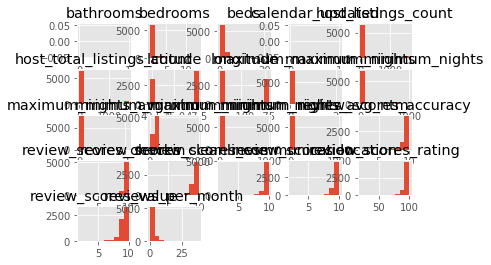

In [64]:
air_listings[numeric_columns].hist();

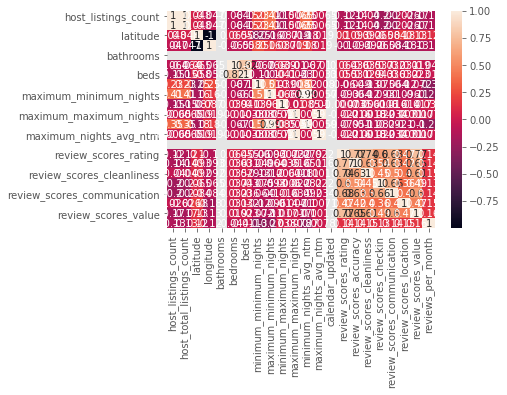

In [65]:
sns.heatmap(air_listings[numeric_columns].corr(), annot=True)

### Issue
minimum_nights and maximum_nights have values that exceed 365.  To resolve this, values exceeding 365 will be set to the value in availability_365 column.

In [66]:
air_listings['minimum_nights'] = np.where(air_listings.minimum_nights > 365, air_listings.availability_365,
                                          air_listings.minimum_nights)
air_listings['maximum_nights'] = np.where(air_listings.maximum_nights > 365, air_listings.availability_365,
                                          air_listings.maximum_nights)

air_listings['minimum_minimum_nights'] =  np.where(air_listings.minimum_minimum_nights > 365, air_listings.availability_365,
                                                   air_listings.minimum_minimum_nights)
air_listings['maximum_minimum_nights'] =  np.where(air_listings.maximum_minimum_nights > 365, air_listings.availability_365,
                                                   air_listings.maximum_minimum_nights)
air_listings['maximum_minimum_nights'] =  np.where(air_listings.maximum_minimum_nights > 365, air_listings.availability_365,
                                                   air_listings.maximum_minimum_nights)
air_listings['maximum_maximum_nights'] =  np.where(air_listings.maximum_maximum_nights > 365, air_listings.availability_365,
                                                   air_listings.maximum_maximum_nights)
air_listings['minimum_nights_avg_ntm'] =  np.where(air_listings.minimum_nights_avg_ntm > 365, air_listings.availability_365,
                                                   air_listings.minimum_nights_avg_ntm)
air_listings['maximum_nights_avg_ntm'] =  np.where(air_listings.maximum_nights_avg_ntm > 365, air_listings.availability_365,
                                                   air_listings.maximum_nights_avg_ntm)

### Validate

In [67]:
air_listings[['minimum_nights','maximum_nights','availability_365','minimum_minimum_nights', 'minimum_minimum_nights',
              'minimum_maximum_nights', 'maximum_maximum_nights',
             'maximum_nights_avg_ntm', ]].sort_values('minimum_nights',ascending=False).head(10)

,minimum_nights,maximum_nights,availability_365,minimum_minimum_nights,minimum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,maximum_nights_avg_ntm
849,365,365,365,365.0,365.0,365.0,365.0,365.0
2825,364,365,365,364.0,364.0,1125.0,365.0,365.0
1572,364,364,364,364.0,364.0,1125.0,364.0,364.0
2900,360,365,365,360.0,360.0,1125.0,365.0,365.0
2331,271,271,0,271.0,271.0,271.0,271.0,271.0
978,210,210,11,210.0,210.0,210.0,210.0,210.0
456,183,183,297,183.0,183.0,1125.0,297.0,297.0
525,182,365,365,182.0,182.0,730.0,365.0,365.0
1386,182,365,83,2.0,2.0,365.0,365.0,365.0
686,180,363,363,180.0,180.0,1125.0,363.0,363.0


In [68]:
air_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571 entries, 0 to 3235
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7571 non-null   int64         
 1   listing_url                                   7571 non-null   object        
 2   scrape_id                                     7571 non-null   int64         
 3   last_scraped                                  7571 non-null   datetime64[ns]
 4   name                                          7571 non-null   object        
 5   description                                   7532 non-null   object        
 6   neighborhood_overview                         5340 non-null   object        
 7   picture_url                                   7571 non-null   object        
 8   host_id                                       7571 non-null   int64 

# Issue 

Fix missing values

### Code

In [69]:
bath_test = {'1 bath' : 1, '1 shared bath' : 1.0, '2 baths':  2, '1 private bath': 1, '1.5 baths' : 1.5,
             '2 shared baths' : 2.0, '2.5 baths' : 2.5, '1.5 shared baths' : 1.5, '3 baths' : 3,
             '3.5 baths' : 3.5, '3 shared baths' : 3, '2.5 shared baths': 2.5, '0 shared baths' : 0, 
             '4 baths' : 4.0, 'Half-bath' : 0.5, '4.5 baths' : 4.5, '0 baths' : 0, '3.5 shared baths' : 3.5, 
             '6 baths' : 6, '5 shared baths': 5, '6 shared baths' : 6, '4 shared baths' : 4,  'Shared half-bath' : 0.5,
             'Private half-bath' : 0.5, '11 baths' : 11, '5 baths' : 5}

In [70]:
air_listings['bathrooms']= air_listings['bathrooms_text'].map(bath_test) 

In [71]:
air_listings['bathrooms'].sample(20)

2866    1.0
2406    2.0
1577    1.0
3302    1.0
2086    2.5
758     1.5
569     1.0
3646    1.0
197     1.0
1594    1.0
1124    1.0
3548    2.0
2580    3.0
748     1.0
1955    2.0
1856    1.0
1899    1.0
1734    2.0
2090    1.0
681     1.0
Name: bathrooms, dtype: float64

In [72]:
# drop license as it has 100% missing values
air_listings.drop(['license'],axis = 1, inplace=True)

In [73]:
# drop bathrooms_text as it was only used to create the bathrooms column
air_listings.drop(['bathrooms_text'],axis = 1, inplace=True)

In [74]:
# change NaN to today's date
air_listings['host_since'] = np.where(air_listings.host_since.isnull(), pd.to_datetime('today'), air_listings.host_since)

In [75]:
# change NaN to today's date
air_listings['first_review'] = np.where(air_listings.first_review.isnull(), pd.to_datetime('today'),
                                        air_listings.first_review)

In [76]:
# change NaN to today's date
air_listings['last_review'] = np.where(air_listings.last_review.isnull(), pd.to_datetime('today'),
                                      air_listings.last_review)

In [77]:
# change missing to unknown
air_listings['neighbourhood_group_cleansed'] = np.where(air_listings.neighbourhood_group_cleansed.isnull(), \
                                               'missing', air_listings.neighbourhood_group_cleansed)

In [78]:
# change to "False"
air_listings['has_availability'] = np.where(air_listings.has_availability.isnull(), False, air_listings.has_availability)

In [79]:
# change to "not entered"
air_listings['neighborhood_overview'] = np.where(air_listings.neighborhood_overview.isnull(), 'Not provided',\
                                                 air_listings.neighborhood_overview)

In [80]:
# change to "not provided"
air_listings['host_about'] = np.where(air_listings.host_about.isnull(), 'Not provided', air_listings.host_about)

In [81]:
# change to "not provided"
air_listings['host_listings_count'] = np.where(air_listings.host_listings_count.isnull(), 'Not provided', 
                                               air_listings.host_listings_count)

In [82]:
# change all missin review scores to equal mean
air_listings['review_scores_accuracy'] = np.where(air_listings.review_scores_accuracy.isnull(),\
                                                  air_listings.review_scores_accuracy.mean(), \
                                                  air_listings.review_scores_accuracy)

In [83]:
air_listings['review_scores_checkin'] = np.where(air_listings.review_scores_checkin.isnull(),\
                                                  air_listings.review_scores_checkin.mean(), \
                                                  air_listings.review_scores_checkin)  

In [84]:
air_listings['review_scores_location'] = np.where(air_listings.review_scores_location.isnull(),\
                                                  air_listings.review_scores_location.mean(), \
                                                  air_listings.review_scores_location) 

In [85]:
air_listings['review_scores_value'] = np.where(air_listings.review_scores_value.isnull(),\
                                                  air_listings.review_scores_value.mean(), \
                                                  air_listings.review_scores_value) 

In [86]:
air_listings['review_scores_cleanliness'] = np.where(air_listings.review_scores_cleanliness.isnull(),\
                                                  air_listings.review_scores_cleanliness.mean(), \
                                                  air_listings.review_scores_cleanliness) 

In [87]:
air_listings['review_scores_communication'] = np.where(air_listings.review_scores_communication.isnull(),\
                                                  air_listings.review_scores_communication.mean(), \
                                                  air_listings.review_scores_communication) 

In [88]:
air_listings['review_scores_rating'] = np.where(air_listings.review_scores_rating.isnull(),\
                                                  air_listings.review_scores_rating.mean(), \
                                                  air_listings.review_scores_rating) 

In [89]:
# change to 0.  If it is missing, it should equal 0
air_listings['minimum_minimum_nights'] = np.where(air_listings.minimum_minimum_nights.isnull(), 0, 
                                                  air_listings.minimum_minimum_nights)

In [90]:
# change to 0.  If it is missing, it should equal 0
air_listings['maximum_minimum_nights'] = np.where(air_listings.maximum_minimum_nights.isnull(), 0,
                                                  air_listings.maximum_minimum_nights)

In [91]:
# change to 0.  If it is missing, it should equal 0
air_listings['minimum_maximum_nights'] = np.where(air_listings.minimum_maximum_nights.isnull(), 0,
                                                  air_listings.minimum_maximum_nights)

In [92]:
# change to 0.  If it is missing, it should equal 0
air_listings['maximum_maximum_nights'] = np.where(air_listings.maximum_maximum_nights.isnull(), 0,
                                                  air_listings.maximum_maximum_nights)

In [93]:
# change to 0.  If it is missing, it should equal 0
air_listings['minimum_nights_avg_ntm'] = np.where(air_listings.minimum_nights_avg_ntm.isnull(), 0,
                                                  air_listings.minimum_nights_avg_ntm)

In [94]:
# change to 0.  If it is missing, it should equal 0
air_listings['maximum_nights_avg_ntm'] = np.where(air_listings.maximum_nights_avg_ntm.isnull(), 0,
                                                  air_listings.maximum_nights_avg_ntm)

In [95]:
# change to 0.  If it is missing, it should equal 0
air_listings['reviews_per_month'] = np.where(air_listings.reviews_per_month.isnull(), 0, air_listings.reviews_per_month)

In [96]:
# change to mean
air_listings['host_acceptance_rate'] = np.where(air_listings.host_acceptance_rate.isnull(),\
                                                  (air_listings.host_acceptance_rate).mean(), \
                                                  air_listings.host_acceptance_rate) 

In [97]:
# make nulls "not provided"
air_listings['host_response_time'] = np.where(air_listings.host_response_time.isnull(), 'Not provided',\
                                              air_listings.host_response_time)   

In [98]:
air_listings['description'] = np.where(air_listings.description.isnull(), 'Not provided',\
                                              air_listings.description)   

In [99]:
# change nulls to mean.
air_listings['host_response_rate'] = np.where(air_listings.host_response_rate.isnull(),
                                                  (air_listings.host_response_rate*1).mean(), 
                                                  air_listings.host_response_rate) 

In [100]:
# Change to "not identified"
air_listings['neighbourhood'] = np.where(air_listings.neighbourhood.isnull(), 'Not identified',\
                                              air_listings.neighbourhood)

In [101]:
  # change to not identified
air_listings['host_neighbourhood'] = np.where(air_listings.host_neighbourhood.isnull(), 'Not identified',\
                                              air_listings.host_neighbourhood)  

In [102]:
# change to 1
air_listings['bathrooms'] = np.where(air_listings.bathrooms.isnull(), (air_listings.bathrooms).mean(),
                                     air_listings.bathrooms)

In [103]:
# change to not identified
air_listings['host_location'] = np.where(air_listings.host_location.isnull(), 'Not identified',\
                                              air_listings.host_location)

In [104]:
# change to mean
air_listings['bedrooms'] = np.where(air_listings.bedrooms.isnull(),(air_listings.bedrooms).mean(),
                                    air_listings.bedrooms)

In [105]:
# change to 1 bed
air_listings['beds'] = np.where(air_listings.beds.isnull(), (air_listings.beds).mean(), air_listings.beds)  

In [106]:
# change to not identified
air_listings['property_type'] = np.where(air_listings.property_type.isnull(), 'Not identified',\
                                              air_listings.property_type) 

In [107]:
# change to false
air_listings['host_has_profile_pic'] = np.where(air_listings.host_has_profile_pic.isnull(), False,\
                                              air_listings.host_has_profile_pic)

In [108]:
# change to unknown
air_listings['host_name'] = np.where(air_listings.host_name.isnull(), 'Unknown',\
                                              air_listings.host_name) 

In [109]:
# change to False
air_listings['host_identity_verified'] = np.where(air_listings.host_identity_verified.isnull(), False,\
                                              air_listings.host_identity_verified)

In [110]:
# change to False
air_listings['host_is_superhost'] = np.where(air_listings.host_is_superhost.isnull(), False,\
                                              air_listings.host_is_superhost)

In [111]:
# change to 0
air_listings['host_total_listings_count'] = np.where(air_listings.host_total_listings_count.isnull(), False,\
                                              air_listings.host_total_listings_count) 

In [112]:
# change to no url
air_listings['host_thumbnail_url'] = np.where(air_listings.host_thumbnail_url.isnull(), 'Missing url',\
                                              air_listings.host_thumbnail_url)

In [113]:
# change to no url
air_listings['host_picture_url'] = np.where(air_listings.host_picture_url.isnull(), 'Missing url',\
                                              air_listings.host_picture_url) 

In [114]:
column_list = air_listings.columns

##We will keep the following variables:



##Check nas

nulls={}
for feat in column_list:
    nulls[feat]=air_listings[feat].isnull().sum()*1.0/len(air_listings[feat])
nulls

{'id': 0.0,
 'listing_url': 0.0,
 'scrape_id': 0.0,
 'last_scraped': 0.0,
 'name': 0.0,
 'description': 0.0,
 'neighborhood_overview': 0.0,
 'picture_url': 0.0,
 'host_id': 0.0,
 'host_url': 0.0,
 'host_name': 0.0,
 'host_since': 0.0,
 'host_location': 0.0,
 'host_about': 0.0,
 'host_response_time': 0.0,
 'host_response_rate': 0.0,
 'host_acceptance_rate': 0.0,
 'host_is_superhost': 0.0,
 'host_thumbnail_url': 0.0,
 'host_picture_url': 0.0,
 'host_neighbourhood': 0.0,
 'host_listings_count': 0.0,
 'host_total_listings_count': 0.0,
 'host_verifications': 0.0,
 'host_has_profile_pic': 0.0,
 'host_identity_verified': 0.0,
 'neighbourhood': 0.0,
 'neighbourhood_cleansed': 0.0,
 'neighbourhood_group_cleansed': 0.0,
 'latitude': 0.0,
 'longitude': 0.0,
 'property_type': 0.0,
 'room_type': 0.0,
 'accommodates': 0.0,
 'bathrooms': 0.0,
 'bedrooms': 0.0,
 'beds': 0.0,
 'amenities': 0.0,
 'price': 0.0,
 'minimum_nights': 0.0,
 'maximum_nights': 0.0,
 'minimum_minimum_nights': 0.0,
 'maximum_mini

In [115]:
airtest = air_calendar.groupby([ 'city'])[['date', 'listing_id','available']]
airtest.head()



,date,listing_id,available
0,2020-10-25,22153582,1
1,2020-10-26,22153582,1
2,2020-10-27,22153582,1
3,2020-10-28,22153582,1
4,2020-10-29,22153582,1
0,2020-11-10,3781,0
1,2020-11-10,3677662,0
2,2020-11-11,3677662,0
3,2020-11-12,3677662,1
4,2020-11-13,3677662,1


In [116]:
top_rated_boston = air_listings[air_listings['city']== 'Boston']
top_rated_seattle = air_listings[air_listings['city'] == 'Seattle']

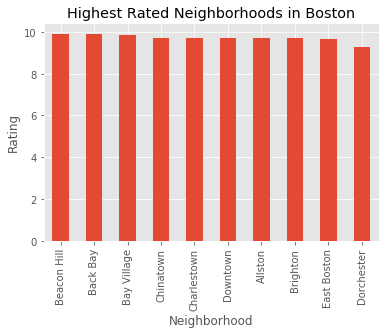

In [117]:
top_rating_neighborhood_b = top_rated_boston.groupby(top_rated_boston['neighbourhood_cleansed'])['review_scores_location'].mean()
top_rating_neighborhood_b[:10].sort_values(ascending=False).plot(kind='bar')
plt.title("Highest Rated Neighborhoods in Boston")
plt.xlabel('Neighborhood')
plt.ylabel('Rating')
plt.show()

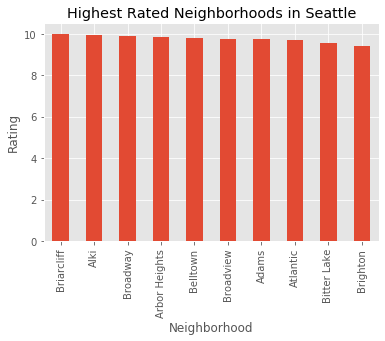

In [118]:
top_rating_neighborhood_s = top_rated_seattle.groupby(top_rated_seattle['neighbourhood_cleansed'])['review_scores_location'].mean()
top_rating_neighborhood_s[:10].sort_values(ascending=False).plot(kind='bar')
plt.title("Highest Rated Neighborhoods in Seattle")
plt.xlabel('Neighborhood')
plt.ylabel('Rating')
plt.show()

In [119]:
top_rating_neighborhood_s.sort_values(ascending=False).tail(10)

neighbourhood_cleansed
Bitter Lake               9.536964
Montlake                  9.527856
Pinehurst                 9.473684
Dunlap                    9.451360
Brighton                  9.434798
Pioneer Square            9.429528
North College Park        9.341632
Holly Park                9.333333
Georgetown                9.319897
International District    8.979945
Name: review_scores_location, dtype: float64

In [120]:
mean_price_neighborhood_s = top_rated_seattle.groupby(top_rated_seattle['neighbourhood_cleansed'])['price'].mean()
round(mean_price_neighborhood_s[:10].sort_values(ascending=False), 2)

neighbourhood_cleansed
Briarcliff       231.38
Alki             166.13
Broadview        136.71
Adams            131.66
Belltown         127.67
Broadway         122.17
Atlantic         120.80
Arbor Heights    115.00
Brighton         111.67
Bitter Lake      100.20
Name: price, dtype: float64

In [121]:
mean_price_neighborhood_b = top_rated_boston.groupby(top_rated_seattle['neighbourhood_cleansed'])['price'].mean()
round(mean_price_neighborhood_b[:10].sort_values(ascending=False), 2)

neighbourhood_cleansed
Broadview        173.47
Adams            168.40
Broadway         156.45
Belltown         152.38
Bitter Lake      148.42
Atlantic         141.95
Brighton         132.48
Arbor Heights    128.31
Alki             122.49
Briarcliff       108.75
Name: price, dtype: float64

In [122]:
air_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394585 entries, 0 to 123709
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     394585 non-null  int64         
 1   id             394585 non-null  int64         
 2   date           394585 non-null  datetime64[ns]
 3   reviewer_id    394585 non-null  int64         
 4   reviewer_name  394584 non-null  object        
 5   comments       394378 non-null  object        
 6   city           394585 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.1+ MB


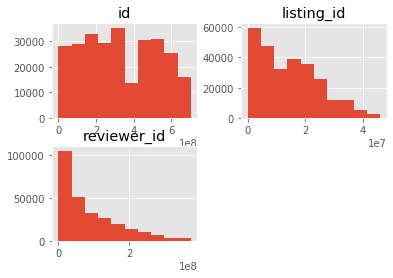

In [123]:
airbnb_seattle_reviews.hist();

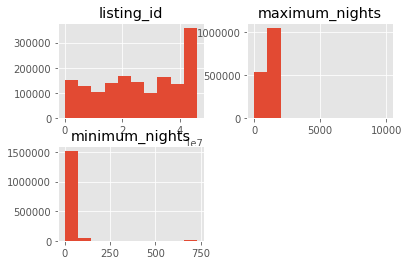

In [124]:
airbnb_seattle_calendar.hist();

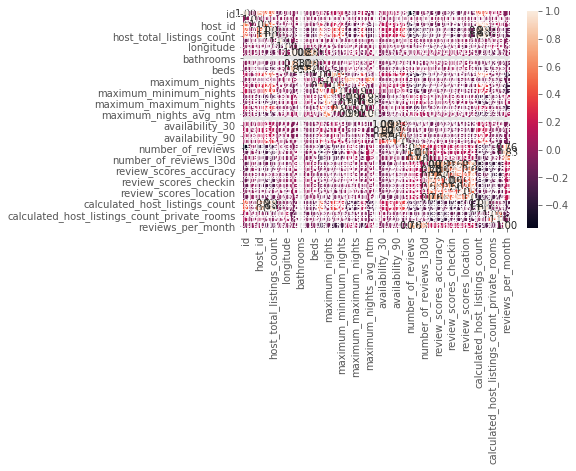

In [126]:
sns.heatmap(airbnb_seattle_listings.corr(), annot=True, fmt = '.2f');

### Data Preparation

In this section, we need to alter create dummy variables for the amenities and host_verification columns.

In [127]:
air_listings.amenities.head()

0    ["Children\u2019...
1    ["Iron", "Hanger...
2    ["Iron", "TV", "...
3    ["Conditioner", ...
4    ["Iron", "TV", "...
Name: amenities, dtype: object

In [128]:
air_listings.host_verifications.head()

0    ['email', 'phone...
1    ['email', 'phone...
2    ['email', 'phone...
3    ['email', 'phone...
4    ['email', 'phone...
Name: host_verifications, dtype: object

In [129]:
# This function cleans the amenities and puts them into a list

def get_column_name_list(column, variable_name):
    
    col_list=[]
    for col in column:
        col=col.replace('"','')
        col=col.replace('{','')
        col=col.replace('}','')
        col=col.replace('[','')
        col=col.replace(']','')        
        col=col.replace("translation missing: en.hosting_amenity_49", 'Unknown amenity')
        col=col.replace("translation missing: en.hosting_amenity_50", 'Unknown amenity')
        col_list += col.split(',')

    #Transform list into a data frame
    col_list2=pd.DataFrame(col_list) 
    
    #rename the column as variable_name
    col_list2.rename(columns={0:variable_name},inplace=True) 

    #group by category and count
    col_list2=col_list2.groupby(variable_name)[variable_name].count().sort_values(ascending=False)
    
    #Rename varible_name column as count
    col_list2.rename({variable_name:'count'},inplace=True) 

    return col_list2

In [130]:

#Get amenities

amenities=get_column_name_list(air_listings.amenities, 'amenities') #Total

amenities

amenities
 Smoke alarm                                                                     7373
 Essentials                                                                      7061
 Carbon monoxide alarm                                                           6899
 Heating                                                                         6894
 Hangers                                                                         6783
                                                                                 ... 
 but I bought new some years ago. It is older but has always worked very good       1
 clock radio sound system with Bluetooth and aux                                    1
 double ovens stainless steel oven                                                  1
 electric oven gas stove                                                            1
Wifi \u2013 60 Mbps                                                                 1
Name: amenities, Length: 393, dtype: int64

In [131]:
unique_items = amenities

In [132]:
# Tis code will transform rows to columns and show true or false if item is in the dictionary
def boolean_df(item_lists, unique_items):
    
    #create empty dictionary
    bool_dict={}
    
    #loop through all the tags
    for i, item in enumerate(unique_items):
        
        # apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
    
    # return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [133]:
# This creates the list from which I created the remapping dictionary "amenities_list", below
dummymatrix = boolean_df(listings['amenities'], unique_items.keys())
collist = dummymatrix.columns.values
collist

array([' Smoke alarm', ' Essentials', ' Carbon monoxide alarm',
       ' Heating', ' Hangers', ' Hair dryer', ' Kitchen', ' Shampoo',
       ' Wifi', ' TV', ' Laptop-friendly workspace', ' Dryer',
       ' Hot water', ' Refrigerator', ' Microwave', ' Coffee maker',
       ' Dishes and silverware', ' Fire extinguisher', ' Washer', ' Iron',
       ' Cooking basics', ' Bed linens', ' Stove', ' Oven',
       ' Air conditioning', ' Long term stays allowed',
       ' Private entrance', ' Extra pillows and blankets',
       ' First aid kit', ' Dishwasher', ' Free street parking',
       ' Free parking on premises', ' Patio or balcony', ' Cable TV',
       ' Garden or backyard', 'Iron', ' Keypad', ' Elevator', ' Gym',
       ' BBQ grill', ' Lockbox', 'Wifi', ' Luggage dropoff allowed',
       ' Lock on bedroom door', ' Indoor fireplace', 'Washer',
       ' Shower gel', ' Pack \\u2019n Play/travel crib',
       'Luggage dropoff allowed', ' Bathtub', ' Baking sheet',
       ' Paid parking off pr

In [134]:
# This is the remapping dicstionary. It reduces the number of wordy amenities to a more manageable list
amenities_list = {'  Bath & Body Works shampoo' : 'Shampoo',  ' 100% Vegan and Cruelty-Free body soap' : 'Soap',
' 100% Vegan' : 'Vegan', ' 2 burner Cook Top Only electric stove' : 'Stove',
' 24-hour fitness center' : '24 hour fitness center', ' 20\\ HDTV' : 'TV',
' 3/4 size fridge + mini fridge' : 'Refrigerator', ' 27\\ TV' : 'TV',
' 32\\ HDTV with Netflix' : 'TV with Netflix', ' 32\\ HDTV' : 'TV with Netflix',
' 32\\ TV with Netflix' : 'TV with Netflix', ' 32\\ TV' : 'TV', 
' 34\\ TV with standard cable' : 'TV with Cable', ' 365 Whole Foods Conditioner conditioner' : 'Conditioner',
' 365 Whole Foods Shampoo shampoo' : 'Shampoo', ' 39\\ HDTV with Netflix' : 'TV with Netflix',
' 40\\ HDTV with Amazon Prime Video': 'TV with Amazon Prime', ' 40\\ HDTV with Netflix' : 'TV with Netflix',
' 40\\ HDTV' : 'TV',  ' 43\\ TV' : 'TV',  ' 48\\ HDTV with Netflix' : 'TV',
 ' 50\\ HDTV with Netflix' : 'TV with Netflix',
' 50\\ HDTV with standard cable' : 'TV with Cable', ' 50\\ TV with Chromecast' : 'TV with Cromecast', 
' 50\\ TV' : 'TV',        ' 55\\ HDTV with Netflix': 'TV with Netflix',  ' 55\\ HDTV' : 'TV', 
' 55\\ TV with Netflix' : 'TV with Netflix',  ' 55\\ TV with standard cable' : 'TV with Cable',
' 60\\ TV with Chromecast': 'TV with Cromecast',  ' 65\\ HDTV with Netflix' : 'TV with Netflix', 
 ' Air conditioning' : 'Air Cond',  ' Alaffia' : 'Other',        ' Alexa and on tv sound system' : 'Alexa sound system',  ' Alexa sound system' : 'Alexa sound system', ' Amazon Prime Video': 'TV with Amazon Prime', 
' American Range stainless steel gas stove' : 'Stove',  ' American Range stainless steel oven' : 'Oven',
' and because it is in the Studio I bought a self defrost because this keeps the room much quieter!  It has the freezer in the refrigerator. refrigerator': 'Other',   ' and Jayson body wash body soap' : 'Body wash',
' Apartment-sized refrigerator and freezer refrigerator' : 'Refrigerator',  ' Baby bath' : 'Bassinet',
 'Lockbox' : 'Lockbox', ' Baby monitor' : 'Baby monitor',  ' Babysitter recommendations' : 'Other',
' Barbecue utensils' : 'Kitchenware',  ' Bath & Body Works body soap' : 'Soap', 
' Bath & Body Works conditioner' : 'Conditioner',  ' Bath & Body Works shampoo' : 'Shampoo',
' Bathroom essentials' : 'Essentials',  ' Bathtub' : 'Bathtub', ' Baking sheet' : 'Kitchenware',
 ' BBQ grill': 'BBQ grill',  ' Beach essentials' : 'Beach essentials', ' Beachfront' : 'Beachfront',
 ' Beauty and Planet 2 in 1 Shampoo and Conditioner Bar (Coconut and Mimosa) shampoo' : 'Shampoo',
' Beauty and Planet 2 in 1 Shampoo and Conditioner Bar (Coconut and Mimosa) conditioner' : 'Shampoo',  ' Bed linens': 'Linens',  ' Bed sheets and pillows' : 'Bed sheets and pillows',
' Bedroom comforts' : 'Bed sheets and pillows',  ' Bertazzoni - gas top gas stove' : 'Stove', 
 ' Bertazzoni electric oven oven' : 'Oven', ' Bike rental available' : 'Bike rental' , 
' Blomberg refrigerator' : 'Refrigerator', ' Bluetooth sound system' : 'Bluetooth sound system',
' Bluetooth speaker' : 'Bluetooth speaker',  ' Body soap' : 'Body wash',  ' body wash body soap' : 'Body wash',
' BOSCH refrigerator' : 'Refrigerator',  ' Bosch stainless steel gas stove' : 'Stove',
' BOSCH stainless steel oven' : 'Oven', ' Bosch' : 'Oven', ' Bose Bluetooth sound system' : 'Bluetooth sound system', ' Bread maker' : 'Bread maker',  ' Breakfast' : 'Breakfast',  ' Breck conditioner' : 'Conditioner',  ' Building staff' : 'On-premise staff',
       ' but I bought new some years ago. It is older but has always worked very good' : 'Other',
' Cable TV': 'Cable TV', ' Carbon monoxide alarm' : 'Carbon monoxide alarm',
' Ceiling fan' : 'Ceiling fan', ' Central air conditioning' : 'Central air',  ' Central heating' : 'Central heating',
 ' Changing table' : 'Changing table', ' Children\\u2019s books and toys' : 'Childrens books and toys',
  ' Children\\u2019s dinnerware' : 'Children dinnerware', ' Chromecast' : 'TV with Chromecast',
 ' Cleaning before checkout' : 'Other', ' clock radio sound system with Bluetooth and aux' : 'Bluetooth sound system', ' Coffee maker': 'Coffee Maker',  ' Complimentary breakfast' : 'Complimentary breakfast',
 ' Concierge' : 'Concierge',  ' Conditioner' : 'Conditioner',  ' Convection  oven' : 'Oven',
' Cooking basics' : 'Cookware', ' Crib' : 'Crib', ' Dacor duel fuel stove - electric oven' : 'Oven',
' Danby refrigerator' : 'Refrigerator',  ' Dishes and silverware' : 'Dinnerware',
' Dishwasher' : 'Dishwasher', ' double ovens stainless steel oven' : 'Oven',
 ' electric oven gas stove' : 'Stove',  ' Dove body soap' : 'Soap',  ' Dove conditioner' : 'Conditioner',
' Dove or Pantene conditioner' : 'Conditioner',  ' Dove or Pantene shampoo' : 'Shampoo',
' Dove shampoo' : 'Shampoo', ' Dr. Bronners body soap' : 'Soap', ' Dr. Teals body soap' : 'Soap',
' Dryer' : 'Dryer', ' Dryer \\u2013 In building' : 'Dryer',  'Shampoo': 'Shampoo',
' Dryer \\u2013\\u00a0In unit' : 'Dryer',   ' Eco body soap' : 'Soap',
 ' etc.) refrigerator' : 'Refrigerator', ' Electric stove' : 'Stove',
' Electrolux refrigerator' : ' Refrigerator', ' Elevator': 'Elevator',  ' Essentials' : 'Essentials',
 ' Ethernet connection' : 'Ethernet connection', ' EV charger' : 'EV charger',
' Extra pillows and blankets': 'Extra pillows and blankets', ' Fireplace guards' : 'Fireplace guards', 
 ' First aid kit' : 'First aid kit', ' Fisher and Paykel stainless steel gas stove' : 'Stove',
' Fisher and Paykel stainless steel oven' : 'Oven', ' Fisher Paykel stainless steel gas stove' : 'Stove',
' Free carport on premises \\u2013 1 space' : 'Free parking on premises',
 ' Free carport on premises' : 'Free parking on premises',
' Free driveway parking on premises \\u2013 1 space' : 'Free parking on premises',
' Free driveway parking on premises \\u2013 2 spaces' : 'Free parking on premises',
' Free driveway parking on premises' : 'Free parking on premises',
' Free parking garage on premises \\u2013 1 space' : 'Free parking on premises',
' Free parking garage on premises' : 'Free parking on premises',
' Free parking on premises' : 'Free parking on premises',
' Free residential garage on premises \\u2013 1 space' : 'Free parking on premises',
 ' Free street parking': 'Free street parking',   ' Free wifi' : 'Wifi',
 ' Freezer has ice maker refrigerator' : 'Refrigerator', ' Freezer' : 'Freezer',
 ' Frigidaire refrigerator' : 'Refrigerator', ' Frigidaire stainless steel electric stove' : 'Stove',
 ' Full kitchen' : 'Kitchen',  ' Game console' : 'Game console',  ' Garden or backyard': 'Garden or backyard', 
' Gas stove stainless steel gas stove' : 'Stove', ' gas stove top oven' : 'Stove', ' Gas stove' : 'Stove',
  ' GE 5 Burner stove  stainless steel gas stove' : 'Stove' , ' GE refrigerator' : 'Refrigerator',
 ' GE WIFI Double oven stainless steel oven' : 'Oven',  ' General Electric electric stove' : 'Stove',
' General Electric oven' : 'Oven',  ' General Electric refrigerator' : 'Refrigerator',
' Gilchrist and Somes body soap' : 'Soap',
 ' Ginger Lily Farms Botanicals Coco Mango Moisturizing Shampoo' : 'Shampoo',
' Ginger Lily Farms Botanicals Island Tranquility Nourishing Body Wash' : 'Body wash',
 ' Gluten & Cruelty-Free conditioner' : 'Conditioner', ' Gluten and Cruelty-Free shampoo' : 'Shampoo',
 ' Gym': 'Gym', ' HAIER 4 DOOR with Digital Display (lock' : 'Smart lock',
 ' Hair dryer' : 'Hair dryer', ' Hangers': 'Hangers',  ' HBO Max' : 'TV with HBO Max',
' HDTV with Amazon Prime Video' : 'TV with Amazon Prime', ' HDTV with Netflix' : 'TV with Netflix', 
 ' HDTV with standard cable' : 'TV with Cable',  ' HDTV' : 'TV',  ' Heating' : 'Heating',
' High end hot plate; large size convection toaster oven induction stove' : 'Stove',
' Host greets you' : 'Host greeting',  ' Hot tub' : 'Hot tub', ' Hot water' : 'Hot Water',
 ' House bikes' : 'Free bicycles', ' if needed refrigerator' : 'Refrigerator',
' Indoor fireplace': 'Indoor fireplace',  ' Induction stove' : 'Stove',
' Irish Spring Shower gel/Dial liquid hand soap/Tulip body soap body soap' : 'Shower gel',
 ' Iron': 'Iron',  ' Keypad': 'Keyless entry',  ' Kitchen' : 'Kitchen', ' Kitchen Aide refrigerator' : 'Refrigerator',
 ' Kitchenaid refrigerator' : 'Refrigerator',  ' KitchenAid refrigerator' : 'Refrigerator',
' Kitchenaid stainless steel gas stove' : 'Stove',  ' KitchenAid stainless steel oven' : 'Oven',
 ' Kitchenaid stainless steel oven' : 'Oven',  ' Kitchenette' : 'Kitchen', ' Lake access' : 'Lake access',
' Laptop-friendly workspace': 'Workspace',   ' Laundromat nearby' : 'Laundromat nearby',
' LG gas stove' : 'Stove',  ' LG oven' : 'Oven', ' LG refrigerator' : 'Refrigerator',
' Limited housekeeping \\u2014 ' : 'Housekeeping',  ' liquid body soap' : 'Shower gel',
' Little Seed Farm sustainable handcrafted bar soap (zero waste!) body soap' : 'Soap',
' Lock on bedroom door': 'Bedroom lock',  ' Lockbox': 'Lockbox',
' Long term stays allowed': 'Extended stay', ' Loreal conditioner' : 'Conditioner',
' Love' : 'Other', ' Luggage dropoff allowed': 'Luggage dropoff allowed', 
' Microwave':'Microwave',   ' Mini fridge' : 'Refrigerator',  ' Natural / Vegan body soap' :  'Soap',
' Natural / Vegan conditioner' : 'Conditioner', ' Natural / Vegan shampoo' : 'Shampoo',
 ' Natural Spa Quality' : 'Other', ' Nespresso machine' : 'Coffee machine',
' New.  It  four burners very good full size stove and full oven. It is white. electric stove' : 'Stove',
' No stove but has a hot plate electric stove' : 'Hot plate', ' Nourishes and Cleans Skin' : 'Soap',
' Nutresse shampoo and conditioner conditioner' : 'Shampoo',
' Onsite restaurant \\u2014 Cosmica' : 'Other',  ' Outdoor Grill gas stove' : 'Stove',
 ' Outlet covers' : 'Other',   ' Oven' : 'Oven', ' Pack \\u2019n Play/travel crib' : 'Travel crib',
 ' Paid parking garage off premises' : 'Paid parking off premise',
       ' Paid parking garage on premises \\u2013 1 space' : 'Paid parking on premise',
 ' Paid parking garage on premises' : 'Paid parking on premise',
       ' Paid parking lot off premises' : 'Paid parking off premise',
       ' Paid parking lot on premises \\u2013 1 space' : 'Paid parking on premise',
       ' Paid parking lot on premises'  : 'Paid parking on premise',
       ' Paid parking off premises' : 'Paid parking off premise', 
       ' Paid parking on premises \\u2013 1 space' : 'Paid parking on premie',
' Paid parking on premises' : 'Paid parking on premise',
 ' Paid street parking off premises' : 'Paid parking off premise',
       ' Panasonic sound system' : 'Sound system', ' Pantene conditioner' : 'Conditioner',
 ' Pantene shampoo' : 'Shampoo',  ' Paraben' : 'Other',  ' Patio or balcony': 'Patio or balcony',
' Pets allowed' : 'Pets allowed',  ' Phosphate' : 'Other', ' Piano' : 'Piano',
' Pocket wifi' : 'Wifi',
' Polk sound bar can be accessed via your wifi/phone sound system' : 'Sound system',
 ' Pool' : 'Pool',  ' High chair' : 'High chair',  ' Portable air conditioning' : 'Portable air conditioning',
       ' Portable fans' : 'Portable fans',  ' Portable heater' : 'Portable heater',
' Pour Over Coffee' : 'Coffee',  ' premium cable' : 'TV with Cable',  ' Private entrance' : 'Private entrance',
' Private hot tub' : 'Hot tub',   ' Private living room' : 'Private space',  ' Radiant heating' : 'Heating',
' Record player' : 'Other',  ' Refrigerator' : 'Refrigerator',  ' Rice Maker' : 'Other', 
' Room-darkening shades' : 'Room darkening shades',  ' Safe' : 'Safe',  ' Samsung oven' : 'Oven',
 ' Samsung refrigerator' : 'Refrigerator',
' Samsung Soundbar M5 sound system with Bluetooth and aux' : 'Bluetooth sound system',
' Samsung stainless steel electric stove' : 'Stove', ' Samsung stainless steel gas stove' : 'Stove',
 ' Samsung stainless steel oven' : 'Oven',   ' Selection of travel size provided conditioner' : 'Conditioner',
 ' Self check-in' : 'Self check in',  ' Self-parking \\u2014 $42/stay' : ' Paid on premise parking',
 ' Shampoo' : 'Shampoo',   ' Shared hot tub' : 'Hot tub', ' Shower gel' : 'Body wash', 
' Single level home' : 'Other',  ' Ski-in/Ski-out' : 'Ski-in and ski-out' ,   ' Slippers' : 'Other',
' Smart Inverter refrigerator' : 'Refrigerator', ' Smart lock' : 'Smart lock',  'Bathtub' : 'Bathtub',
' Smoking allowed' : 'Smoking allowed', ' Softens' : 'Other', 'Bed sheets and pillows' : 'Bed sheets and pillows',
 ' Sonos Bluetooth sound system' : 'Bluetooth sound system', 
 ' Sonos sound system' : 'Bluetooth sound system', 
 ' Sound system with aux' : 'Sound system with aux',  ' Sound system' : 'Sound system', 
' Stainless fridge/freezer refrigerator' : 'Refrigerator', ' Stainless steel electric stove' : 'Stove',
' Stainless steel gas stove' : 'Stove',  ' Stainless steel induction stove' : 'Stove',
' Stainless steel oven' : 'Oven', ' Stainless steel stove' : 'Stove',  ' Stair gates' : 'Other',
' standard cable' : 'TV with cable', ' Stove': 'Stove', ' Sub Zero refrigerator' : 'Refrigerator',
' Sub zero refrigerator' : 'Refrigerator', ' Suitable for events' : 'Other',  ' Sulfate' : 'Other',
' Summit refrigerator' : 'Refrigerator',  ' Table corner guards' : 'Other',  ' thermostat': 'Oher',
 ' Toiletries' : 'Essentials', ' Trash compactor' : 'Other',   ' TV with Chromecast' : 'TV with Chromecast', 
' TV with Netflix' : 'TV with Netflix' ,   ' TV': 'TV', 
  ' Usually Palmolive bar soap and Soft Soap pump in addition to shower gel. body soap' : 'Body wash',
' Varies body soap' : 'Body wash', ' Varies conditioner': 'Conditioner',  ' variety body soap' : 'Body wash',
 ' variety conditioner' : 'Conditioner',   ' vegan and cruelty-free body soap' : 'Body wash',
' vegan and cruelty-free conditioner' : 'Conditioner',  ' vegan and cruelty-free shampoo' : 'Shampoo',
' Viking stainless steel gas stove' : 'Stove', ' viking stainless steel oven' : 'Oven',
 ' Washer \\u2013\\u00a0In building' : 'Washer',  ' Washer \\u2013\\u00a0In unit' : 'Washer',
' Washer': 'Washer', ' Waterfront' : 'Waterfront',  ' Whole Foods Grapefruit body soap' : 'Body wash',
' Whole Foods Grapefruit conditioner' : 'Conditioner', ' Wifi' : 'Wifi' ,  ' Wifi \\u2013 100 Mbps' : 'Wifi',
 ' Wifi \\u2013 15 Mbps' : 'Wifi',  ' HDTV with premium cable' : 'TV with Cable',
 ' Wifi \\u2013 150 Mbps' : 'Wifi',  ' Wifi \\u2013 200 Mbps' : 'Wifi', ' Wifi \\u2013 363 Mbps' : 'Wifi',
 ' Game room' : 'Game room',  ' Wifi \\u2013 60 Mbps' : 'Wifi', ' Wifi \\u2013 600 Mbps' : 'Wifi',
' Wifi \\u2013 70 Mbps' : 'Wifi', ' Wifi \\u2013 90 Mbps' : 'Wifi', ' Wifi \\u2013 940 Mbps' : 'Wifi',
 ' Wifi \\u2013 980 Mbps' : 'Wifi', ' Window AC unit' : 'Window Air Conditioner',
 ' Window guards' : 'Other', " Dr Bonner's  shampoo" : 'Shampoo',
" If Dominic goes shopping it's likely a name brand like Ivory" : 'Soap',
" if I go shopping it's a bit more bougie. Enjoy the element of surprise while staying at our home! body soap":'Body wash',
" I'm not sure of brand" : 'Other',
 " L'occitane bar soap" : 'Other', " Trader Joe's Tea Tree shampoo" : 'Shampoo',
" Trader Joe's Tea Tree shower gel and selection of bar soaps body soap" : ' Body wash',
 ' Fire extinguisher': 'Fire extinguisher',  ' Laundry services' : 'Laundry',
'40\\ HDTV with Netflix' : 'TV with Netflix',  'Air conditioning' : 'Air conditioning',
'Alba or Pantene conditioner' : 'Conditioner', 'Smoke alarm': 'Smoke Alarm', 'Baby bath' : 'Bassinette',
 'Barbecue utensils' : 'Kitchenware', 'Bath & Body Works shampoo' : 'Shampoo',
 'Bed linens' : 'Bed linens', 'Bedroom comforts' : 'Bed linens and pillows',
'BOSCH stainless steel gas stove' : 'Stove',  'Breakfast' : 'Breakfast', 'Building staff' : 'Staff on site',
 'Carbon monoxide alarm' : 'Carbon monoxide alarm',
'Children\\u2019s books and toys' : 'Childrens books and toys',
 'Children\\u2019s dinnerware' : 'Childrens dinnerware',  'Conditioner' : 'Conditioner',
 'Cooking basics' : 'Kitchenware', 'Dacor duel fuel - gas stove top' : 'Stove',  'Dishwasher' : 'Dishwasher',
'Elevator' : 'Elevator',  'Essentials' : 'Essentials',  'Fire extinguisher' : 'Fire extinguisher',
'Free street parking' : 'Free off premise parking',
'Ginger Lily Farms Club & Fitness Aloe Vera Moisturizing Conditioner' : 'Conditioner',
 'Hair dryer' : 'Hair dryer',  'Hangers' : 'Hangers', 'Hot water' : 'Hot water',   'Keypad' : 'Smart keypad',
 'Kitchen' : 'Kitchen',    'Kitchenaid stainless steel oven' : 'Oven', 'Lake access' : 'Lake access',
'Laptop-friendly workspace' : 'Workspace',   'Laundromat nearby' : 'Laundromat nearby',
 'Lock on bedroom door' : 'Lock on bedroom door', 'Long term stays allowed' : 'Long term stay allowed',
'Luggage dropoff allowed' : 'Luggage dropoff allowed',  'Mini fridge' : 'Refrigerator',
 'Nutresse shampoo shampoo' : 'Shampoo', 'Outlet covers' : 'Child safety',
'Oven' : 'Oven', 'Paid parking garage off premises' : 'Paid parking off premise',
 'Paid parking on premises' : 'Paid parking on premise',  'Private entrance' : 'Private entrance',
 'Smoke alarm' : 'Smoke alarm', 'Stainless steel oven' : 'Oven',  'TV' : 'TV',  'Washer' : 'Washer',
'Wifi \\u2013 60 Mbps' : 'Wifi'}


In [135]:
# This code compares the amenities column to the dictionary and updates with the shorter version
for i, j in amenities_list.items():
    for amenity in amenities:
        air_listings['amenities1'] = np.where(air_listings.amenities == i, j, air_listings.amenities)

In [136]:
# Allow for larger display of colum 
pd.set_option('display.max_colwidth', 120)

# display amenities1 and amenities columns
air_listings[['amenities1', 'amenities']].head()

,amenities1,amenities
0,"[""Children\u2019s books and toys"", ""Iron"", ""Hangers"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Luggage dropoff allowe...","[""Children\u2019s books and toys"", ""Iron"", ""Hangers"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Luggage dropoff allowe..."
1,"[""Iron"", ""Hangers"", ""Lock on bedroom door"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Air conditioning"", ""Microwave"", ...","[""Iron"", ""Hangers"", ""Lock on bedroom door"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Air conditioning"", ""Microwave"", ..."
2,"[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Barbecue utensils""...","[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Barbecue utensils""..."
3,"[""Conditioner"", ""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Bar...","[""Conditioner"", ""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Private entrance"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Bar..."
4,"[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Microwave"", ""Dishwasher"", ""Wifi"", ""Smo...","[""Iron"", ""TV"", ""Hangers"", ""Cable TV"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Microwave"", ""Dishwasher"", ""Wifi"", ""Smo..."


In [137]:
air_listings.amenities1.head()

0    ["Children\u2019s books and toys", "Iron", "Hangers", "Hair dryer", "Carbon monoxide alarm", "Luggage dropoff allowe...
1    ["Iron", "Hangers", "Lock on bedroom door", "Hair dryer", "Carbon monoxide alarm", "Air conditioning", "Microwave", ...
2    ["Iron", "TV", "Hangers", "Cable TV", "Private entrance", "Hair dryer", "Carbon monoxide alarm", "Barbecue utensils"...
3    ["Conditioner", "Iron", "TV", "Hangers", "Cable TV", "Private entrance", "Hair dryer", "Carbon monoxide alarm", "Bar...
4    ["Iron", "TV", "Hangers", "Cable TV", "Hair dryer", "Carbon monoxide alarm", "Microwave", "Dishwasher", "Wifi", "Smo...
Name: amenities1, dtype: object

In [138]:
air_listings.amenities1.head(10)

0    ["Children\u2019s books and toys", "Iron", "Hangers", "Hair dryer", "Carbon monoxide alarm", "Luggage dropoff allowe...
1    ["Iron", "Hangers", "Lock on bedroom door", "Hair dryer", "Carbon monoxide alarm", "Air conditioning", "Microwave", ...
2    ["Iron", "TV", "Hangers", "Cable TV", "Private entrance", "Hair dryer", "Carbon monoxide alarm", "Barbecue utensils"...
3    ["Conditioner", "Iron", "TV", "Hangers", "Cable TV", "Private entrance", "Hair dryer", "Carbon monoxide alarm", "Bar...
4    ["Iron", "TV", "Hangers", "Cable TV", "Hair dryer", "Carbon monoxide alarm", "Microwave", "Dishwasher", "Wifi", "Smo...
5    ["Bathtub", "Children\u2019s books and toys", "Iron", "TV", "Hangers", "Cable TV", "Private entrance", "Hair dryer",...
6    ["Free street parking", "Hot water", "Wifi", "Cooking basics", "Shampoo", "Smoke alarm", "Dryer", "Laptop-friendly w...
7    ["Conditioner", "Iron", "TV", "Hangers", "Hair dryer", "Carbon monoxide alarm", "Microwave", "Dishwasher", "Wifi", "...


In [ ]:
listings.amenities.head(10)

In [ ]:
dummymatrix = boolean_df(air_listings['amenities1'], unique_items.keys())
collist = dummymatrix.columns.values
collist

In [ ]:
PrimList = {}

if appt_ in PrimList:
    print(PrimList[appt_])

In [ ]:
air_listings['amenities_mapped'] = amenities_list( (key, value) for (key, value) in air_listings.amenities.items() if key ==  )

In [ ]:
    
# change to "not provided"
air_listings['amenities'] = np.where((air_listings.amenities== amenities_list[0]), amenities_list.value, 
                                               air_listings.amenities_list)

In [ ]:
air_listings.amenities_mapped.sample(20)

In [ ]:
air_listings[collist] = boolean_df(air_listings['amenities'], unique_items.keys())
air_listings

In [ ]:

collist1 = ['Wireless Internet', 'Heating', 'Kitchen', 'Essentials',
       'Smoke Detector', 'Dryer', 'Washer', 'Internet', 'TV', 'Shampoo',
       'Carbon Monoxide Detector', 'Family/Kid Friendly',
       'Fire Extinguisher', 'Air Conditioning', 'Cable TV',
       'Free Parking on Premises', 'Hangers', 'First Aid Kit',
       'Hair Dryer', 'Laptop Friendly Workspace', 'Iron',
       '24-Hour Check-in', 'Elevator in Building',
       'Buzzer/Wireless Intercom', 'Pets live on this property',
       'Indoor Fireplace', 'Safety Card', 'Unknown amenity',
       'Pets Allowed', 'Gym', 'Dog(s)', 'Breakfast',
       'Lock on Bedroom Door', 'Cat(s)', 'Hot Tub',
       'Wheelchair Accessible', 'Doorman', 'Suitable for Events', 'Pool',
       'Smoking Allowed', '', 'Other pet(s)', 'Free Parking on Street',
       'Paid Parking Off Premises', 'Washer / Dryer']

for cola in collist1:
    
    # Replace True/False with 1/0
    air_listings[cola].replace(True, 1, inplace=True)
    air_listings[cola].replace(False, 0, inplace=True)
# Replace NaN with 0
    air_listings[cola].replace('NaN', 0, inplace=True)


In [ ]:
listings[['amenities', 'Wireless Internet', 'Heating', 'Kitchen', 'Essentials',
       'Smoke Detector', 'Dryer', 'Washer', 'Internet', 'TV', 'Shampoo',
       'Carbon Monoxide Detector', 'Family/Kid Friendly',
       'Fire Extinguisher', 'Air Conditioning', 'Cable TV',
       'Free Parking on Premises', 'Hangers', 'First Aid Kit',
       'Hair Dryer', 'Laptop Friendly Workspace', 'Iron',
       '24-Hour Check-in', 'Elevator in Building',
       'Buzzer/Wireless Intercom', 'Pets live on this property',
       'Indoor Fireplace', 'Safety Card', 'Unknown amenity',
       'Pets Allowed', 'Gym', 'Dog(s)', 'Breakfast',
       'Lock on Bedroom Door', 'Cat(s)', 'Hot Tub',
       'Wheelchair Accessible', 'Doorman', 'Suitable for Events', 'Pool',
       'Smoking Allowed', '', 'Other pet(s)', 'Free Parking on Street',
       'Paid Parking Off Premises', 'Washer / Dryer']].head()

In [ ]:

#Get host_verifications

host_verify=get_column_name_list(air_listings.host_verifications, 'host_verifications') #Total



host_verify

host_verify/host_verify.sum()*100 #Percentage of total tags

(host_verify[0:35]/host_verify.sum()*100).sum()

host_verify

In [ ]:
unique_items = host_verify

In [ ]:
dummymatrix = boolean_df(air_listings['host_verifications'], unique_items.keys())
collist = dummymatrix.columns.values
collist

In [ ]:
collist2 = ['email','phone', 'reviews', 'kba','jumio',
       'facebook', 'linkedin', 'google', 'manual_offline',
       'phone', 'amex', 'manual_online', 'weibo', 'sent_id',
       'photographer', 'None', '','reviews','facebook',
       'google']

In [ ]:
air_listings[collist2] = boolean_df(air_listings['host_verifications'], unique_items.keys())
air_listings

In [ ]:
collist2 = ['email','phone', 'reviews', 'kba','jumio',
       'facebook', 'linkedin', 'google', 'manual_offline',
       'phone', 'amex', 'manual_online', 'weibo', 'sent_id',
       'photographer', 'None', '','reviews','facebook',
       'google']

for cola in collist2:
    
    # Replace True/False with 1/0
    air_listings[cola].replace(True, 1, inplace=True)
    air_listings[cola].replace(False, 0, inplace=True)
# Replace NaN with 0
    air_listings[cola].replace('NaN', 0, inplace=True)


In [ ]:
air_listings[['host_verifications','email','phone', 'reviews', 'kba','jumio',
       'facebook', 'linkedin', 'google', 'manual_offline',
       'phone', 'amex', 'manual_online', 'weibo', 'sent_id',
       'photographer', 'None', '','facebook',
       'google']].head()

In [ ]:
air_listings.host_is_superhost.head()

### Question - What proportion of hosts are Superhosts?

In [ ]:
prop_superhosts = air_listings.groupby(listings['host_is_superhost'])['host_is_superhost'].count()
prop_superhosts

plot = prop_superhosts.plot.pie(y='host_is_superhost', figsize=(5, 5))

### Modeling

In [ ]:

nulls={}
for feat in keep:
    nulls[feat]=air_listings2[feat].isnull().sum()*1.0/len(air_listings2[feat])
nulls

### Modeling

In [ ]:
y=air_listings2.review_scores_rating

In [ ]:
full_list = collist1 + collist2
X = air_listings2[full_list]

In [ ]:
# save air_listings, air_calendar and air_ratings files to .csv file
air_listings.to_csv('air_listins.csv', index = False, encoding = 'utf-8')
air_calendar.to_csv('air_calendar.csv', index = False, encoding = 'utf-8')
air_reviews.to_csv('air_reviews.csv', index = False, encoding = 'utf-8')